# An sbpy Example

Imagine you're a graduate student and your mentor has some very urgent tasks for you:

1. Here is a list of asteroids. Check which of those are observable tonight from Maunakea and send that list to our observer: 1 Ceres, 10, 3200 Phaethon, 3552 Don Quixote, 12893 (1998 QS55), 12345 (1993 FT8), 230 Athamantis, 4500, 3456, 135065
2. Once we have the data in hand, check if either of these objects is brighter than it should be.

In [58]:
from sbpy import bib

bib.track()

## 1. Checking observability

In [30]:
asteroids =['1 Ceres', '10', '3200 Phaethon', '3552 Don Quixote', '12893 (1998 QS55)', 
            '12345 (1993 FT8)', '230 Athamantis', '4500', '3456', '135065']

We need a uniform set of names, designations, or numbers. In this case, we pick numbers:

In [31]:
from sbpy.data import Names

In [59]:
ast_numbers = []

for ast in asteroids:
    ident = Names.parse_asteroid(ast)
    print(ident)
    ast_numbers.append(ident['number'])

{'number': 1, 'name': 'Ceres'}
{'number': 10}
{'number': 3200, 'name': 'Phaethon'}
{'number': 3552, 'name': 'Don Quixote'}
{'number': 12893, 'desig': '1998 QS55'}
{'number': 12345, 'desig': '1993 FT8'}
{'number': 230, 'name': 'Athamantis'}
{'number': 4500}
{'number': 3456}
{'number': 135065}


In [60]:
ast_numbers

[1, 10, 3200, 3552, 12893, 12345, 230, 4500, 3456, 135065]

We retrieve ephemerides for these targets:

In [61]:
from sbpy.data import Ephem
from astropy.time import Time
import astropy.units as u

eph = Ephem.from_horizons(ast_numbers, epochs={'start': Time('2019-09-18'), 'stop': Time('2019-09-19'), 'step': 1*u.h},
                          location='568')

In [62]:
list(eph.field_names)

['targetname',
 'H',
 'G',
 'solar_presence',
 'flags',
 'RA',
 'DEC',
 'RA_app',
 'DEC_app',
 'RA*cos(Dec)_rate',
 'DEC_rate',
 'AZ',
 'EL',
 'AZ_rate',
 'EL_rate',
 'sat_X',
 'sat_Y',
 'sat_PANG',
 'siderealtime',
 'airmass',
 'magextinct',
 'V',
 'surfbright',
 'illumination',
 'illum_defect',
 'sat_sep',
 'sat_vis',
 'ang_width',
 'PDObsLon',
 'PDObsLat',
 'PDSunLon',
 'PDSunLat',
 'SubSol_ang',
 'SubSol_dist',
 'NPole_ang',
 'NPole_dist',
 'EclLon',
 'EclLat',
 'r',
 'r_rate',
 'delta',
 'delta_rate',
 'lighttime',
 'vel_sun',
 'vel_obs',
 'elong',
 'elongFlag',
 'alpha',
 'lunar_elong',
 'lunar_illum',
 'sat_alpha',
 'sunTargetPA',
 'velocityPA',
 'OrbPlaneAng',
 'constellation',
 'TDB-UT',
 'ObsEclLon',
 'ObsEclLat',
 'NPole_RA',
 'NPole_DEC',
 'GlxLon',
 'GlxLat',
 'solartime',
 'earth_lighttime',
 'RA_3sigma',
 'DEC_3sigma',
 'SMAA_3sigma',
 'SMIA_3sigma',
 'Theta_3sigma',
 'Area_3sigma',
 'RSS_3sigma',
 'r_3sigma',
 'r_rate_3sigma',
 'SBand_3sigma',
 'XBand_3sigma',
 'DoppDel

In [63]:
eph

<QTable masked=True length=250>
    targetname        H       G    ...  PABLon   PABLat       epoch      
                     mag           ...   deg      deg                    
      str28        float64 float64 ... float64  float64       object     
------------------ ------- ------- ... -------- ------- -----------------
           1 Ceres    3.34    0.12 ... 259.9317 -1.7911         2458744.5
           1 Ceres    3.34    0.12 ... 259.9414 -1.7925 2458744.541666667
           1 Ceres    3.34    0.12 ... 259.9512 -1.7939 2458744.583333333
           1 Ceres    3.34    0.12 ...  259.961 -1.7952       2458744.625
           1 Ceres    3.34    0.12 ... 259.9707 -1.7966 2458744.666666667
           1 Ceres    3.34    0.12 ... 259.9805  -1.798 2458744.708333333
           1 Ceres    3.34    0.12 ... 259.9903 -1.7993        2458744.75
           1 Ceres    3.34    0.12 ... 260.0001 -1.8006 2458744.791666667
           1 Ceres    3.34    0.12 ... 260.0099 -1.8019 2458744.833333333
      

We select only those ephemerides when the target has an airmass less than 2 and when it's really dark:

In [64]:
eph = eph[eph['airmass'] < 2]  # make a cut on airmass
eph = eph[eph['solar_presence'] == '']  # only dark time

In [65]:
eph

targetname,H,G,solar_presence,flags,RA,DEC,RA_app,DEC_app,RA*cos(Dec)_rate,DEC_rate,AZ,EL,AZ_rate,EL_rate,sat_X,sat_Y,sat_PANG,siderealtime,airmass,magextinct,V,surfbright,illumination,illum_defect,sat_sep,sat_vis,ang_width,PDObsLon,PDObsLat,PDSunLon,PDSunLat,SubSol_ang,SubSol_dist,NPole_ang,NPole_dist,EclLon,EclLat,r,r_rate,delta,delta_rate,lighttime,vel_sun,vel_obs,elong,elongFlag,alpha,lunar_elong,lunar_illum,sat_alpha,sunTargetPA,velocityPA,OrbPlaneAng,constellation,TDB-UT,ObsEclLon,ObsEclLat,NPole_RA,NPole_DEC,GlxLon,GlxLat,solartime,earth_lighttime,RA_3sigma,DEC_3sigma,SMAA_3sigma,SMIA_3sigma,Theta_3sigma,Area_3sigma,RSS_3sigma,r_3sigma,r_rate_3sigma,SBand_3sigma,XBand_3sigma,DoppDelay_3sigma,true_anom,hour_angle,alpha_true,PABLon,PABLat,epoch
,mag,,,,deg,deg,deg,deg,arcsec / h,arcsec / h,deg,deg,arcsec / min,arcsec / min,arcsec,arcsec,deg,h,,mag,mag,mag / arcsec2,%,arcsec,arcsec,,arcsec,deg,deg,deg,deg,deg,arcsec,deg,arcsec,deg,deg,AU,km / s,AU,km / s,min,km / s,km / s,deg,,deg,deg,%,deg,deg,deg,deg,,s,deg,deg,deg,deg,deg,deg,,min,arcsec,arcsec,arcsec,arcsec,deg,arcsec2,arcsec,km,km / s,Hz,Hz,s,deg,,deg,deg,deg,
str28,float64,float64,str1,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str2,float64,float64,float64,float64,float64,float64,float64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
10 Hygiea,5.43,0.15,,m,67.74221,25.18771,68.03933,25.2278,9.368429,2.929782,72.2547,33.467,112.58,808.43,-387132.0,84020.08,296.769,0.4402237669,1.808,0.197,11.47,7.48,98.032,0.0036,378094.2,*,0.181279,0.0,0.0,0.0,0.0,80.55,0.03,0.0,0.0,53.7764,2.9121,3.494668449686,0.0613263,3.09651955244971,-24.5722019,25.752968,15.01186,25.32355,105.0262,/L,16.129,28.5,83.7,58.8477,260.437,264.869,-1.17753,Tau,69.182383,70.1926231,3.2887937,0.0,0.0,173.159715,-15.617214,0.731257267,0.000355,0.048,0.028,0.048,0.028,4.863,0.01,0.056,36.5724,3.1e-06,0.03,0.11,0.000244,178.1498,-4.095731377,16.1274,61.8456,3.1304,2458744.958333333
10 Hygiea,5.43,0.15,,m,67.74505,25.18852,68.0422,25.22861,9.192069,2.879345,73.8761,47.0081,36.21,815.43,-387262.0,84081.02,296.772,1.4429616189,1.365,0.149,11.47,7.48,98.033,0.0036,378232.4,*,0.181314,0.0,0.0,0.0,0.0,80.55,0.03,0.0,0.0,53.7823,2.9119,3.494669923236,0.0611304,3.095928981603,-24.507117,25.748056,15.01185,25.23265,105.0645,/L,16.1258,28.1,83.5,58.8125,260.436,264.87,-1.1781,Tau,69.182384,70.195319,3.2892108,0.0,0.0,173.160838,-15.614715,1.7314677449,0.000355,0.048,0.028,0.048,0.028,4.862,0.01,0.056,36.5675,3.1e-06,0.03,0.11,0.000244,178.1558,-3.09318509,16.1242,61.8499,3.1305,2458745.0
10 Hygiea,5.43,0.15,,m,67.74785,25.18931,68.04502,25.22941,9.048781,2.81403,73.5516,60.6034,-59.23,814.07,-387391.0,84141.89,296.774,2.445699472,1.147,0.125,11.47,7.48,98.034,0.0036,378370.5,*,0.181348,0.0,0.0,0.0,0.0,80.55,0.03,0.0,0.0,53.7883,2.9116,3.494671392073,0.0609345,3.09534022335358,-24.4223743,25.74316,15.01184,25.12698,105.1029,/L,16.1226,27.8,83.3,58.7774,260.434,264.871,-1.17865,Tau,69.182384,70.1979647,3.289621,0.0,0.0,173.161939,-15.612263,2.7316824215,0.000355,0.048,0.028,0.048,0.028,4.861,0.01,0.056,36.5625,3.1e-06,0.03,0.11,0.000244,178.1617,-2.090635226,16.1209,61.8541,3.1305,2458745.041666667
10 Hygiea,5.43,0.15,,m,67.75061,25.19009,68.0478,25.23019,8.946496,2.738001,67.2609,74.0,-231.08,782.83,-387521.0,84202.69,296.776,3.4484373264,1.04,0.113,11.47,7.48,98.035,0.0036,378508.6,*,0.181383,0.0,0.0,0.0,0.0,80.55,0.03,0.0,0.0,53.7942,2.9113,3.494672856195,0.0607387,3.09475368657875,-24.3235024,25.738282,15.01184,25.01306,105.1413,/L,16.1192,27.5,83.1,58.7423,260.4

Let's check rates. Our telescope can only track at absolute rates less than 1 arcsec/second.

In [66]:
import numpy as np

list(np.sqrt(eph['RA*cos(Dec)_rate']**2 + eph['DEC_rate']**2).to('arcsec/s'))

[<Quantity 0.00272663 arcsec / s>,
 <Quantity 0.00267569 arcsec / s>,
 <Quantity 0.00263229 arcsec / s>,
 <Quantity 0.00259891 arcsec / s>,
 <Quantity 0.02321402 arcsec / s>,
 <Quantity 0.02332476 arcsec / s>,
 <Quantity 0.02339743 arcsec / s>,
 <Quantity 0.02342864 arcsec / s>,
 <Quantity 0.00569424 arcsec / s>,
 <Quantity 0.01620078 arcsec / s>,
 <Quantity 0.00644868 arcsec / s>]

Rates are fine. Our targets for tonight are: 

In [67]:
set(eph['targetname'])

{'10 Hygiea',
 '230 Athamantis',
 '3200 Phaethon (1983 TB)',
 '3552 Don Quixote (1983 SA)',
 '4500 Pascal (1989 CL)'}

## 2. Combining data and plotting

The observer sends you V-band photometric observations for Hygiea only:

In [68]:
obs_epochs = Time([2458745.0417, 2458745.0418, 2458745.0419], format='jd')
obs_mags = [8.53, 8.46, 8.49]*u.mag

In [69]:
obs_epochs

<Time object: scale='utc' format='jd' value=[2458745.0417 2458745.0418 2458745.0419]>

In [70]:
obs_epochs.tdb.jd

array([2458745.04250072, 2458745.04260072, 2458745.04270072])

We bundle the data as an `obs` object:

In [71]:
from sbpy.data import Obs

In [72]:
obs = Obs.from_dict({'targetname': [10]*len(obs_epochs), 'epoch': obs_epochs, 'mag': obs_mags})

In [73]:
obs

<QTable length=3>
targetname    epoch       mag  
                          mag  
  int64       object    float64
---------- ------------ -------
        10 2458745.0417    8.53
        10 2458745.0418    8.46
        10 2458745.0419    8.49

In [74]:
obs = obs.supplement()

In [75]:
obs

<QTable masked=True length=3>
targetname_obs    epoch       mag   targetname ... alpha_true  PABLon  PABLat
                              mag              ...    deg       deg     deg  
    int64         object    float64    str9    ...  float64   float64 float64
-------------- ------------ ------- ---------- ... ---------- ------- -------
            10 2458745.0417    8.53  10 Hygiea ...    16.1205 61.8539  3.1306
            10 2458745.0418    8.46  10 Hygiea ...    16.1205 61.8539  3.1306
            10 2458745.0419    8.49  10 Hygiea ...    16.1205  61.854  3.1306

We compare the expected brightness (`eph['V']`) to the actually measured brightness (`eph['mag']`):

In [76]:
print(obs['V'], obs['mag'])

[11.47 11.47 11.47] mag [8.53 8.46 8.49] mag


Hygiea is actually 3 magnitudes brighter than it should be! Let's put this into perspective and compare it to previous observations:

In [77]:
mpc = Obs.from_mpc('10')  # retrieve observations reported to the MPC for Hygiea

In [78]:
mpc

<QTable masked=True length=3593>
number desig discovery note1 ...         DEC           mag   band observatory
                             ...         deg           mag                   
int64   str1    str1    str1 ...       float64       float64 str1     str3   
------ ----- --------- ----- ... ------------------- ------- ---- -----------
    10              --    -- ...  -6.339888888888889     0.0   --         058
    10              --    -- ...  -6.337777777777777     0.0   --         058
    10              --    -- ...  -6.337888888888888     0.0   --         058
    10              --    -- ...  -21.78391666666667     0.0   --         787
    10              --    -- ...  -21.75713888888889     0.0   --         787
    10              --    -- ...           -21.75575     0.0   --         787
    10              --    -- ... -21.744111111111113     0.0   --         787
    10              --    -- ... -21.722555555555555     0.0   --         787
    10              --    -- ..

In [79]:
list(mpc.field_names)

['number',
 'desig',
 'discovery',
 'note1',
 'note2',
 'epoch',
 'RA',
 'DEC',
 'mag',
 'band',
 'observatory']

In [80]:
mpc = mpc[mpc['band'] == 'V']  # extract V-band observations only

In [81]:
mpc

number,desig,discovery,note1,note2,epoch,RA,DEC,mag,band,observatory
,,,,,,deg,deg,mag,,
int64,str1,str1,str1,str1,object,float64,float64,float64,str1,str3
10,,--,--,M,2401848.53492,52.401708333333325,22.88175,10.5,V,534
10,,--,--,M,2420953.48705,200.82120833333332,-15.058416666666668,8.9,V,018
10,,--,--,M,2420955.45362,200.46224999999998,-14.93913888888889,8.7,V,018
10,,--,--,M,2420964.49213,198.74079166666664,-14.304416666666667,8.6,V,018
10,,--,--,M,2421435.42792,306.92837499999996,-17.31563888888889,9.5,V,020
10,,--,--,M,2421447.35384,304.52475,-17.666666666666668,9.1,V,531
10,,--,--,M,2421448.33781,304.33799999999997,-17.684805555555556,9.1,V,531
10,,--,--,M,2421468.32206,301.31787499999996,-18.09563888888889,10.0,V,531


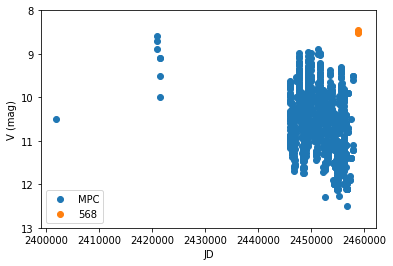

In [82]:
import matplotlib.pyplot as plt

plt.scatter(mpc['epoch'].jd, mpc['mag'], label='MPC')
plt.scatter(obs['epoch'].jd, obs['mag'], label='568')
plt.ylim([13, 8])
plt.xlabel('JD')
plt.ylabel('V (mag)')
plt.legend(loc=3)

We should write a paper...

In [88]:
print(bib.to_icarus())

% sbpy/software:_sbpy:
\bibitem[Mommert et al.(2019)]{2019JOSS....4.1426M} Mommert, M., and 11 colleagues 2019.\ sbpy: A Python module for small-body planetary astronomy.\ The Journal of Open Source Software 4, 1426.

% sbpy.data.ephem.Ephem.from_horizons/software:_astroquery:
\bibitem[Ginsburg et al.(2019)]{2019AJ....157...98G} Ginsburg, A., and 24 colleagues 2019.\ astroquery: An Astronomical Web-querying Package in Python.\ The Astronomical Journal 157, 98.

% sbpy.data.ephem.Ephem.from_horizons/data_source:
\bibitem[Giorgini et al.(1996)]{1996DPS....28.2504G} Giorgini, J.~D., and 9 colleagues 1996.\ JPL's On-Line Solar System Data Service.\ AAS/Division for Planetary Sciences Meeting Abstracts \#28 25.04.

% sbpy.data.obs.Obs.supplement/software:_astroquery:
\bibitem[Ginsburg et al.(2019)]{2019AJ....157...98G} Ginsburg, A., and 24 colleagues 2019.\ astroquery: An Astronomical Web-querying Package in Python.\ The Astronomical Journal 157, 98.

% sbpy.data.obs.Obs.from_mpc/software:_